# **Teaching a taxi to pick up and drop passengers using Reinforcement Learning**


In [4]:
import gym # Install OpenAI Gym 
import numpy as np 
import pickle, os 



In [15]:
env = gym.make("Taxi-v3", render_mode="rgb_array") #Creating the Environment 
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>

In [173]:
state = env.reset() #Resetting the State of the Taxi
state


(33, {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)})

In [7]:
env.observation_space.n #Number of States in the Taxi-Environment


500

## POSSIBLE STATES
Taxi Location: Row(values from 0 to 4),Column(values from 0 to 4)

Passenger Location,There are five possible states:

0: Red (R), 
1: Green (G),
2: Yellow (Y), 
3: Blue (B), 
4: Inside the taxi,Pick up a passenger at the taxi's current location, provided there is a passenger there, 
5: Drop Off: Drop off the passenger at the taxi's current location, provided the passenger's destination matches the current location




In [184]:
n_actions = env.action_space.n #Number of Actions in the Environment
print(n_actions)
n_states = env.observation_space.n #Number of States in the Environment
n_states

6


500

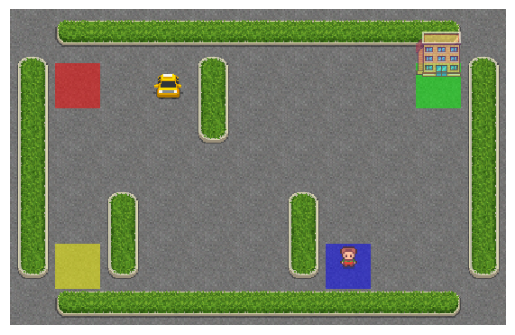

In [185]:
import matplotlib.pyplot as plt #For the Visualization of the TaxiEnvironment
# Manually set the state (taxi_row, taxi_col, passenger_location, destination)
#state = env.encode(3, 0, 3, 4) # (taxi_row, taxi_col, passenger_location, destination)
#env.s = state
frame = env.render()
plt.imshow(frame)
plt.axis('off')  # Hide the axes for a cleaner output
plt.show()

# Actions 
Action 0 (North), 
Action 1 (South), 
Action 2 (East), 
Action 3 (West), 
Action 4 (Pick Up), 
Action 5 (Drop Off) 

In [188]:
env.step(1) 

(33,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 0], dtype=int8)})

In [189]:
state = env.reset()
counter = 0
g = 0
reward = None #boolean value

In [ ]:
while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())  
    counter += 1